### Student ID: 18195067
### Student Name: Abhijit Sinha

# Task 3 (CE6002)

*Create your own implementation of linear classification to perform a classification of the dataset provided in the Etivity3_LinearClassification.ipynb notebook without adding extra features to those provided. Use normal linear regression with sign(wTx) to obtain a classification.*

*Observe your results and explain why these results seem disappointing (record your thoughts in a Markdown cell in your notebook).*

---------------------------------
*Now choose suitable new features and use these in your linear classification algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!*

*Also, use scikit-learn’s Logistic Regression algorithm and compare the performance with your algorithm. It is useful to spend some time thinking about the difference in approach taken in Logistic Regression.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

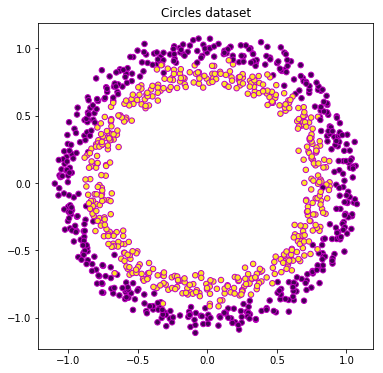

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, marker='o', s=30, edgecolors='m')
plt.title("Circles dataset")
plt.show()

In [4]:
X.shape

(1000, 2)

In [5]:
len(y)

1000

### Linear Classification Implementation 
- Matrix X and vector y with bias term of x0=1
- Calculate the pseudo inverse for matrix X using "np.linalg.pinv"
- Get the weights w = [inv(trans(X) * X ) * trans(X)] * y

In [6]:
def get_weights(X, y):
    # Function to find the weight matrix    
    weight_matrix = np.zeros(1 + X.shape[1])
    pseudo_inv_matrix = np.linalg.pinv(X)
    weight_matrix = pseudo_inv_matrix.dot(y)
    return weight_matrix

def y_hat(X, weight_matrix):
    # Function to calculate the y_hat
    return (np.dot(X, np.transpose(weight_matrix)))

def predict_class(X):
    # Function to predict the classification label for the input data X
    return np.sign(y_hat(X))

In [7]:
# Reference: Took inspriration from Vipul's plot

def plot_decision_boundary(X, y, weight_matrix):
    
    plt.figure(figsize=(8, 8))   
    # Plot the data samples
    plt.scatter(X[:,0], X[:,1], c=y, marker='o', s=30, edgecolors='m')
    
    # Getting the X and Y position for the classification
    x_min, x_max = X.min(), X.max()
    X_pos = [x_min, x_max]  
    vert_pos  = abs(y_hat(X, weight_matrix).mean())
    Y_pos = decision_boundary_line(weight_matrix, x_min, x_max, vert_pos)
    
    # Plot the decision boundary
    plt.plot(X_pos, Y_pos, 'bo-.', linewidth=2.2)  

def decision_boundary_line(weights, x_min, x_max, bias):
   # Function to find the decision boundary coordinates
   return [point_on_decision_boundary(weights, x_min, bias), point_on_decision_boundary(weights, x_max, bias)]

def point_on_decision_boundary(weights, x, bias):
    # Fucntion to find the y-pos on the boundary based on given x-pos
    return -(bias + weights[0]*x) / weights[1]    


In [8]:
# Get the weights for linear classifier
weight_matrix = get_weights(X, np.array(y))

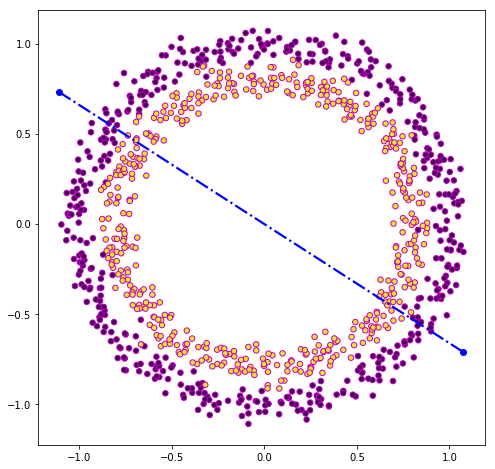

In [9]:
# Plot the decision boundary
plot_decision_boundary(X, y, weight_matrix)

### B. Observe your results and explain why these results seem disappointing (record your thoughts in a Markdown cell in your notebook).

The **dataset is not linearly separable** due to which the **linear classification algorithm is not able to split to data properly.** W can see from the plot that in this case 50% of data has a chance of being misclassified.

### C. Now choose suitable new features and use these in your linear classification algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved
    - Try a few different ones and note the differences!

### 1. Transforming the data points by Square method
Lets do some non-linear transformation on the data feature and move from X space to Z space and then apply the Linear classification algorithm.

Weight matrix =  [-0.24887147 -0.24947556]


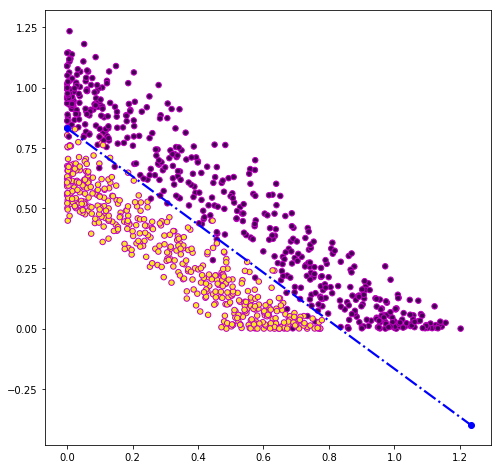

In [10]:
# Square the X data
X_square = np.square(X)

# Get the weights
weight_matrix = get_weights(X_square, np.array(y))
print("Weight matrix = ", weight_matrix)

# Plot the decision boundary
plot_decision_boundary(X_square, y, weight_matrix)

### Observation of "Square" feature transformation on the classification:
After we apply the square transformation on the original data (non-linearly separable), the new feature space is linearly separable.
The linear classification algorithm works correctly on the linearly separable data

We can see that after applying the classification on the square transformed data the classification performance have improved a lot. 

##### Note: In this case we have looked at the data which was a circle and hence squaring method was used to improve the Ein, this may lead to data snooping and makes the VC generalization bound invalid

### TODO: D. Try a few different ones and note the differences!
Reference: https://people.revoledu.com/kardi/tutorial/Regression/nonlinear/NonLinearTransformation.htm

Z=[1,X1,X2,X1_sq, X2_sq]

In [21]:
# WIP for features
X_cos = np.cos(X)
print(X_0)

[[0.99999069 0.7157955 ]
 [0.56320769 0.97737959]
 [0.95841402 0.56934029]
 ...
 [0.75767191 0.91414281]
 [0.99882766 0.53009934]
 [0.5478511  0.99706511]]


Weight matrix =  [0.03322334 0.03039102]


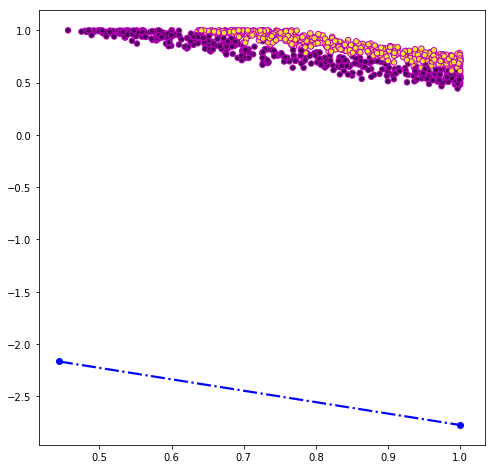

In [22]:
# Get the weights
weight_matrix = get_weights(X_cos, np.array(y))
print("Weight matrix = ", weight_matrix)

# Plot the decision boundary
plot_decision_boundary(X_cos, y, weight_matrix)

### E. Also, use scikit-learn’s Logistic Regression algorithm and compare the performance with your algorithm
- Think about the difference in approach taken in Logistic Regression

## Scikit-Learn Logistic Regression

In [14]:
# Logistic regression on Original data
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)
y_pred=log_reg.predict(X)

raw_score = log_reg.score(X, y)
print("Logistic regression: Mean accuracy score on Raw data =",raw_score)

Logistic regression: Mean accuracy score on Raw data = 0.496


In [15]:
# Logistic regression on Squared data
log_reg_sq = LogisticRegression(solver='lbfgs')
log_reg_sq.fit(X_square,y)
y_pred = log_reg_sq.predict(X_square)

squared_score = log_reg_sq.score(X_square, y)
print("Logistic regression: Mean accuracy score on Squared transformed data =",squared_score)

Logistic regression: Mean accuracy score on Squared transformed data = 0.977


We can see significant improvement in classification performance of the square transformed data

### Plotting the decision boundary for Logistic regression
Reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

In [16]:
def classification_boundary(X, score, classifier, title):
    
    # Plot the decision boundary and assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    # Print the classification score 
    plt.text(xx.max()-.1, yy.min()+.3, ('Score=%.2f'%score), size=15, horizontalalignment='right')
    
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

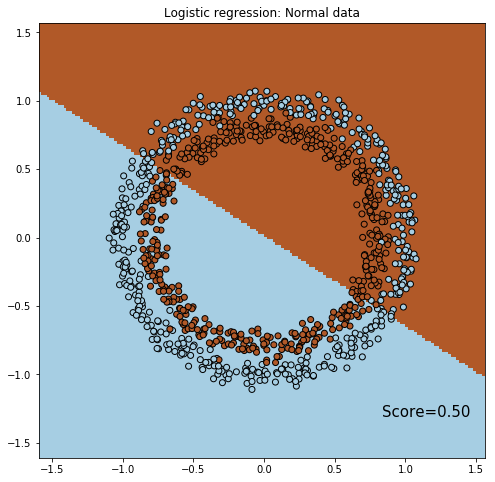

In [17]:
classification_boundary(X, raw_score, classifier=log_reg, title="Logistic regression: Normal data")

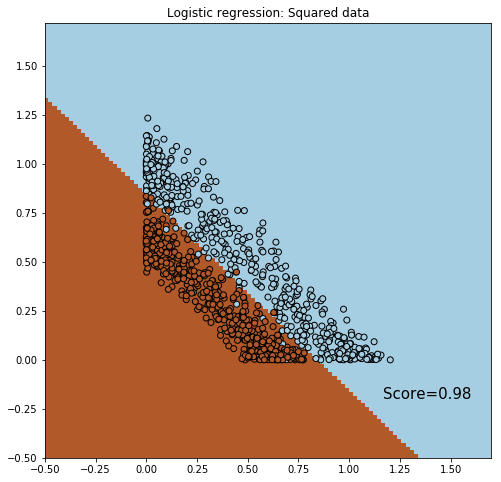

In [18]:
classification_boundary(X_square, squared_score, classifier=log_reg_sq, title="Logistic regression: Squared data")

### TODO: Analyze the quality of the newly created features in Task 3: 
- Minimum number of suitable features used without loss of performance.